# Image Filtering

<br></br>

### Moving average in 1D - Uniform weights

In [1]:
import scipy.ndimage
import skimage
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.util import img_as_ubyte 
from skimage.filters import median 

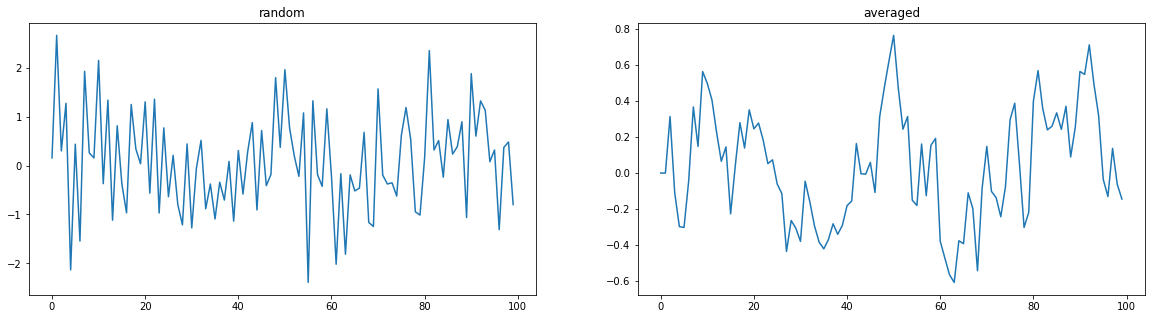

In [2]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))

rand_1d = np.random.randn(100)
ax[0].plot(rand_1d)
ax[0].set_title('random')

# moving average with kernel size of 5. 
width = 5
assert width & 1 # check if odd.
for idx in range(len(rand_1d)):
    if not idx - 2 < 0 or not idx + 2 > len(rand_1d):
        average = sum(rand_1d[idx - 2 : idx + 2]) / 5
        rand_1d[idx] = average

ax[1].plot(rand_1d)
ax[1].set_title('averaged')
plt.show()

### Moving average in 2D - Uniform weights

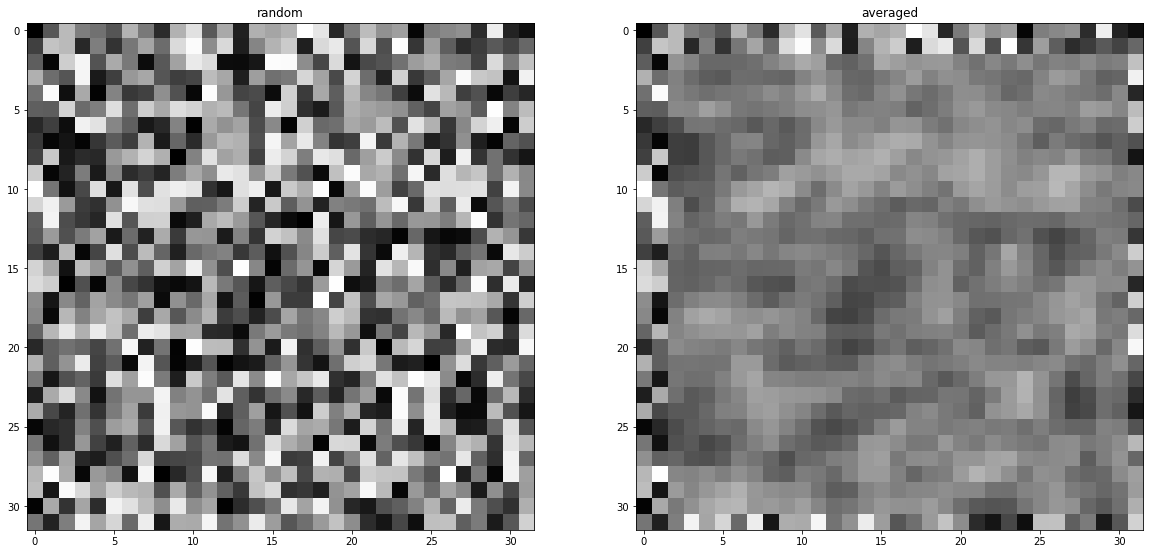

In [3]:
rand_2d = np.random.rand(32, 32)

fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(rand_2d, 'gray')
ax[0].set_title('random')

# moving average with kernel size of 3x3
# won't calculate the edges :(
def moving_averages_uniform_2d(arr):
    for i in range(len(arr)):
        if i - 2 < 0 or i + 2 > len(arr):
            continue
        for j in range(len(arr[i])):
            if j - 2 < 0 or j + 2 > len(arr[i]):
                continue
            # uniform weights
            arr[i][j] = ( arr[i-1][j-1] + arr[i-1][j] + arr[i-1][j+1] +
                          arr[i][j-1]   + arr[i][j]   + arr[i][j+1]   +
                          arr[i+1][j-1] + arr[i+1][j] + arr[i+1][j+1])/ 9

moving_averages_uniform_2d(rand_2d)
ax[1].imshow(rand_2d, 'gray')
ax[1].set_title('averaged')

plt.show()

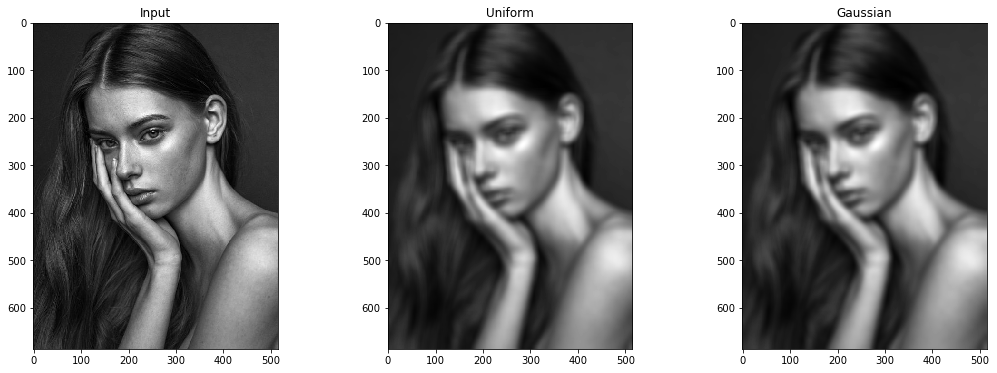

In [4]:
orig_im = scipy.ndimage.imread('data/portrait.jpg', 'L')
im_out = np.zeros(orig_im.shape)
k_size = (15, 15)
sigma = 10


fix, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].set_title('Input')
ax[0].imshow(orig_im, 'gray', interpolation='none')

# Uniform filter creates sharp edges around the kernel
im_out = cv.blur(orig_im, k_size, sigma)
ax[1].set_title('Uniform')
ax[1].imshow(im_out, 'gray', interpolation='none')

im_out = cv.GaussianBlur(orig_im, k_size, sigma)
ax[2].set_title('Gaussian')
ax[2].imshow(im_out, 'gray', interpolation='none')
plt.show()

/Users/osmanmesutozcan/.pyenv/versions/anaconda3-4.4.0/envs/cv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


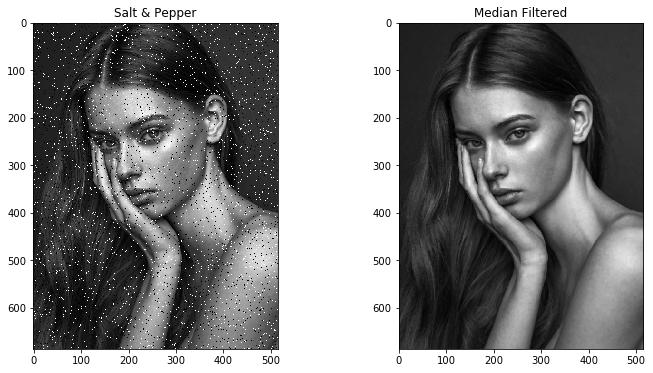

In [5]:
# Salt and pepper noise
orig_im = img_as_ubyte(imread('data/portrait.jpg', as_grey=True))
snp_noise = skimage.util.random_noise(orig_im, mode='s&p')

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].imshow(snp_noise, 'gray')
ax[0].set_title('Salt & Pepper')

filtered = median(snp_noise)
ax[1].imshow(filtered, 'gray')
ax[1].set_title('Median Filtered')

plt.show()